In [0]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D
from keras.utils import plot_model

Using TensorFlow backend.


In [0]:

(X_train,Y_train),(X_test,Y_test)  = cifar10.load_data()
print(X_train.shape)
print(Y_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [0]:
# from PIL import Image
# import numpy as np
# X_train = np.mean(X_train, axis=3)
# Y_train =np.squeeze(Y_train)  
# X_test = np.mean(X_test, axis=3)
# Y_test =np.squeeze(Y_test)

In [0]:
# X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
# print(X_train.shape)
# X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
# print(X_test.shape)
# X_train = X_train/255
# X_test  = X_test/255
# X_train = X_train.astype('float')
# X_test  = X_test.astype('float')
# print(X_train[0].shape)
# Y_train.shape

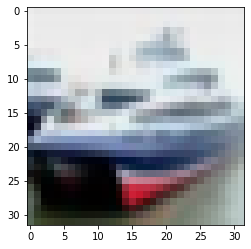

In [0]:

plt.imshow(X_test[1])

In [0]:

np.random.seed(0)
model = Sequential()
model.add(Conv2D(16,input_shape=(32,32,3),kernel_size=(3,3),activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
#model.add(MaxPooling2D())

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation='softmax'))

model.summary()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(X_train,Y_train,batch_size=32,epochs=20,validation_split=0.1,shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 98,730
Trainable params: 98,730
Non-trainable params: 0
__________________________________________________

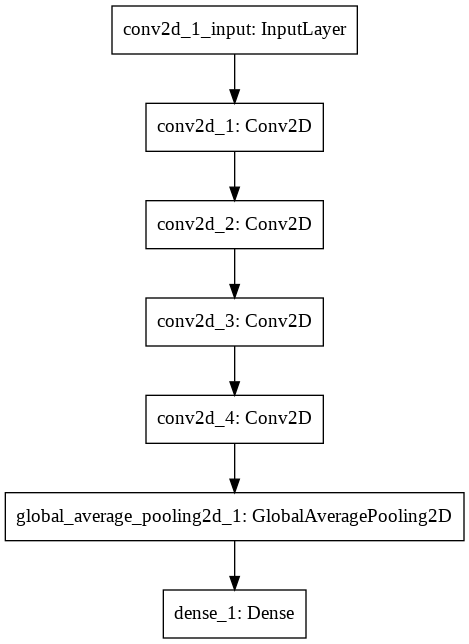

In [0]:
plot_model(model,to_file='model.png')

In [0]:
model.save('Activation.h5')

In [0]:
model.evaluate(X_test, Y_test)
model.summary()

10000/10000 [==============================] - 1s 112us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 98,730
Trainable params: 98,730
Non-trainable

In [0]:
from keras.models import Model
import scipy as sp
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

(128, 10)

In [0]:
cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))

In [0]:
cam_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290

In [0]:
features,results = cam_model.predict(X_test)
features.shape

(10000, 32, 32, 128)

3
(32, 32, 128)


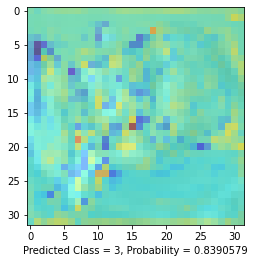

1
(32, 32, 128)


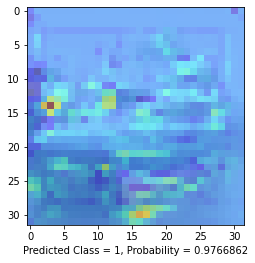

1
(32, 32, 128)


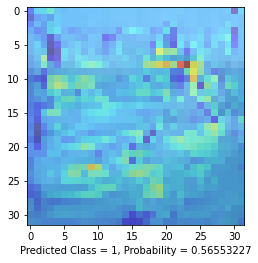

8
(32, 32, 128)


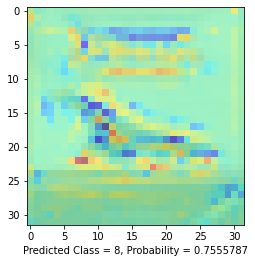

6
(32, 32, 128)


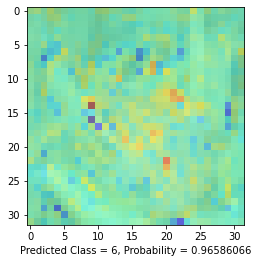

6
(32, 32, 128)


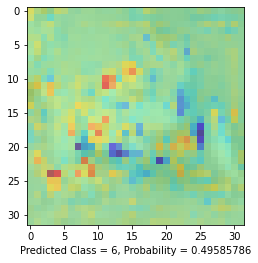

1
(32, 32, 128)


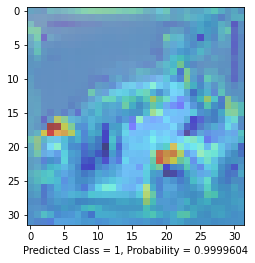

6
(32, 32, 128)


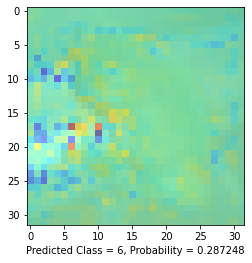

5
(32, 32, 128)


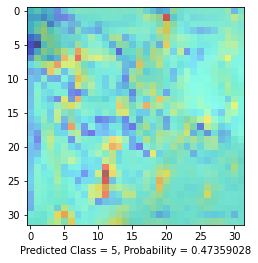

1
(32, 32, 128)


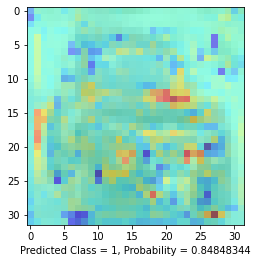

In [0]:
for idx in range(10):
    features_for_one_img = features[idx,:,:,:]
    #height_roomout = X_train.shape[1]/features_for_one_img.shape[0]
    #width_roomout  = X_train.shape[2]/features_for_one_img.shape[1]
    #print(height_roomout,width_roomout)
 
    #cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    #print(cam_features.shape)
    pred = np.argmax(results[idx])
    print(pred)
    cam_features = features_for_one_img
    
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,pred]
    cam_output  = np.dot(cam_features,cam_weights)
    print(features_for_one_img.shape)

    buf = 'Predicted Class = ' +str( pred )+ ', Probability = ' + str(results[idx][pred])

    plt.xlabel(buf)

    plt.imshow(X_test[idx],alpha=0.5)

    plt.imshow(cam_output, cmap='jet',alpha=0.5)

     

    plt.show()